## Supplementary Figure - Total Fleet Emissions
Siobhan Powell, 2021.

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
maxpen_results1 = pd.read_csv('Results/max_penetration_levels_1h_20211119.csv', index_col=0)
maxpen_results8 = pd.read_csv('Results/max_penetration_levels_1h_bau_20211119.csv', index_col=0)

In [4]:
maxpen_results8

,fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak,fuel1_solar1_wind1_BusinessAsUsual_WPcontrol_minpeak,fuel1_solar5_wind5_BusinessAsUsual_WPcontrol_minpeak
TimersMixed,0.59,0.01,1.0


In [5]:
solar = 2.5
wind = 2.5 
cols = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_noWPcontrol' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols1 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_minpeak' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols2 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_avgem' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]

In [9]:
maxpen_results1.loc['TimersNone', cols[0]] * 98 + (1-maxpen_results1.loc['TimersNone', cols[0]]) * 404

272.41999999999996

In [13]:
def fig3c(maxpen_results, cols, cols1, cols2, maxpen_result_bau, legend=True, save_str=None):
    fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
    titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
    colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
    control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
    hatches = ['//', '/', '', '.', 'o']

    axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
    axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
    axes.set_ylabel('Change in Weekday Peak [GW]', fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=14)

    values = maxpen_results.loc['Timers9pm', cols]
    values2 = np.zeros((4, ))
    for i in range(4):
        values2[i] = values[i] * 98 + (1-values[i]) * 404
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, values2, 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
    values = maxpen_results.loc['Timers12am', cols]
    values2 = np.zeros((4, ))
    for i in range(4):
        values2[i] = values[i] * 98 + (1-values[i]) * 404
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, values2, 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1])
    values = maxpen_results.loc['TimersNone', cols1]
    values2 = np.zeros((4, ))
    for i in range(4):
        values2[i] = values[i] * 98 + (1-values[i]) * 404
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, values2, 0.1, color=colors[3], label=control_labels[3], edgecolor='k', hatch=hatches[3])
    values = maxpen_results.loc['TimersNone', cols2]
    values2 = np.zeros((4, ))
    for i in range(4):
        values2[i] = values[i] * 98 + (1-values[i]) * 404
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, values2, 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
    values = maxpen_results.loc['TimersNone', cols]
    values2 = np.zeros((4, ))
    for i in range(4):
        values2[i] = values[i] * 98 + (1-values[i]) * 404
    axes.bar(np.array([0, 1, 2.5, 3.5]), values2, 0.1, color=colors[2], edgecolor='k', label=control_labels[2], hatch=hatches[2])
    axes.bar([1.75], maxpen_result_bau * 98 + (1-maxpen_result_bau) * 404, 0.1, color='#ffffbf', edgecolor='k', hatch='x')
        
    edgecolors=[None, None, 'k', None, None]
    legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                                 label=control_labels[i]) for i in range(len(control_labels))]
    legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
    if legend:
        axes.legend(handles=legend_elements, loc=(1, 1), fontsize=10.5, ncol=1)
        
    
    axes.set_ylabel('Total Fleet Emissions [g CO2 / mile]', fontsize=12)
    axes.set_xlabel('Access Scenario', fontsize=12)
    axes.set_axisbelow(True)        
    axes.grid(axis='y')

    plt.tight_layout()
    if save_str is not None:
        plt.savefig('SupplementPlotting/Plots/'+save_str+'.pdf', bbox_inches='tight')
    plt.show()

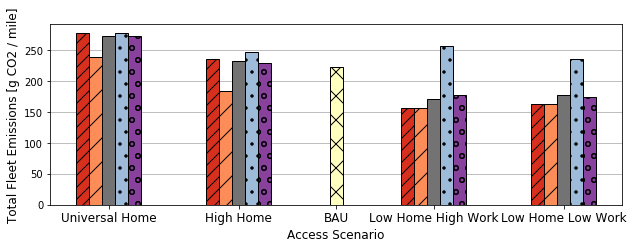

In [15]:
fig3c(maxpen_results1, cols, cols1, cols2, maxpen_results8.loc['TimersMixed', 'fuel1_solar2.5_wind2.5_BusinessAsUsual_WPcontrol_minpeak'], legend=False, save_str='supfig20_emissions')
